## Day6- datetime, target mean, target ordinal, prob ratio encoding

#### Adding variable to capture nan values 

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('../Day5-Feature_Scaling, Handling Missing Features/house-price-pred.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


Similar to that of numerical features, for categorical features also we can use the method of variable adding where the null values are present which the model can understand that there is some significance for that values.

In [4]:
df['FireplaceQu'].isnull().sum()

690

In [5]:
df['FireplaceQu_null']=np.where(df['FireplaceQu'].isnull(),1,0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_null
0,Gd,NaN,Attchd,208500,1
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [7]:
df['FireplaceQu'].fillna(value=df['FireplaceQu'].mode()[0],inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,FireplaceQu_null
0,Gd,Gd,Attchd,208500,1
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


Its easy to use and fast, but the disadvantage is when there are null values in most of the features which increases the dimensionality 

#### considering the null values of feature as a new category alltogether

In [11]:
df=pd.read_csv('../Day5-Feature_Scaling, Handling Missing Features/house-price-pred.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [12]:
def impute_nan(df,variable):
    df[variable+'_null']=np.where(df[variable].isnull(),'Missing',df[variable])
for col in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,col)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_null,FireplaceQu_null,GarageType_null
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [13]:
df['FireplaceQu_null'].value_counts()

Missing    690
Gd         380
TA         313
Fa          33
Ex          24
Po          20
Name: FireplaceQu_null, dtype: int64

In [14]:
df.drop(labels=['BsmtQual','FireplaceQu','GarageType'],axis=1,inplace=True)
df.head()

,SalePrice,BsmtQual_null,FireplaceQu_null,GarageType_null
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd


## Encoding DateTime Values

In [15]:
import datetime
today=datetime.datetime.today()
today

datetime.datetime(2020, 9, 30, 8, 56, 25, 560035)

In [16]:
today-datetime.timedelta(1)

datetime.datetime(2020, 9, 29, 8, 56, 25, 560035)

In [18]:
days=[today-datetime.timedelta(x) for x in range(0,15)]

In [19]:
df=pd.DataFrame(days,columns=["days"])
df.head()

,days
0,2020-09-30 08:56:25.560035
1,2020-09-29 08:56:25.560035
2,2020-09-28 08:56:25.560035
3,2020-09-27 08:56:25.560035
4,2020-09-26 08:56:25.560035


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   days    15 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 248.0 bytes


In [25]:
df['date']=[datetime.date(x.year,x.month,x.day) for x in df['days']]
df.head()

,days,date
0,2020-09-30 08:56:25.560035,2020-09-30
1,2020-09-29 08:56:25.560035,2020-09-29
2,2020-09-28 08:56:25.560035,2020-09-28
3,2020-09-27 08:56:25.560035,2020-09-27
4,2020-09-26 08:56:25.560035,2020-09-26


In [40]:
df['day']=df['days'].dt.day
df['month']=df['days'].dt.month
df['year']=df['days'].dt.year
df['hour']=df['days'].dt.hour
df['minute']=df['days'].dt.minute
df['day_name']=df['days'].dt.day_name()
df.head()

,days,date,day,month,year,hour,minute,weekday,day_name
0,2020-09-30 08:56:25.560035,2020-09-30,30,9,2020,8,56,2,Wednesday
1,2020-09-29 08:56:25.560035,2020-09-29,29,9,2020,8,56,1,Tuesday
2,2020-09-28 08:56:25.560035,2020-09-28,28,9,2020,8,56,0,Monday
3,2020-09-27 08:56:25.560035,2020-09-27,27,9,2020,8,56,6,Sunday
4,2020-09-26 08:56:25.560035,2020-09-26,26,9,2020,8,56,5,Saturday


we can map the features accordingly as per categories/ordinal values

In [41]:
df['day_name_ordinal']=df['day_name'].map({'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7})
df.head()

,days,date,day,month,year,hour,minute,weekday,day_name,day_name_ordinal
0,2020-09-30 08:56:25.560035,2020-09-30,30,9,2020,8,56,2,Wednesday,3
1,2020-09-29 08:56:25.560035,2020-09-29,29,9,2020,8,56,1,Tuesday,2
2,2020-09-28 08:56:25.560035,2020-09-28,28,9,2020,8,56,0,Monday,1
3,2020-09-27 08:56:25.560035,2020-09-27,27,9,2020,8,56,6,Sunday,7
4,2020-09-26 08:56:25.560035,2020-09-26,26,9,2020,8,56,5,Saturday,6


Lets play around with the date feature and derive various other important features from Sales store dataset

In [45]:
df=pd.read_excel('Store Sales Data.xlsx',usecols=['Order Date','Ship Date','Sales'])
df.head()

,Order Date,Ship Date,Sales
0,2012-05-28,2012-05-30,5.90
1,2010-07-07,2010-07-08,13.01
2,2011-07-27,2011-07-28,49.92
3,2011-07-27,2011-07-28,41.64
4,2011-07-27,2011-07-27,1446.67


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9426 non-null   datetime64[ns]
 1   Ship Date   9426 non-null   datetime64[ns]
 2   Sales       9426 non-null   float64       
dtypes: datetime64[ns](2), float64(1)
memory usage: 221.0 KB


In [47]:
df['Days to Ship']=df['Ship Date']-df['Order Date']
df.head()

,Order Date,Ship Date,Sales,Days to Ship
0,2012-05-28,2012-05-30,5.90,2 days
1,2010-07-07,2010-07-08,13.01,1 days
2,2011-07-27,2011-07-28,49.92,1 days
3,2011-07-27,2011-07-28,41.64,1 days
4,2011-07-27,2011-07-27,1446.67,0 days


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype          
---  ------        --------------  -----          
 0   Order Date    9426 non-null   datetime64[ns] 
 1   Ship Date     9426 non-null   datetime64[ns] 
 2   Sales         9426 non-null   float64        
 3   Days to Ship  9426 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), timedelta64[ns](1)
memory usage: 294.7 KB


In [49]:
df['Order Date day']=df['Order Date'].dt.day
df['Order Date month']=df['Order Date'].dt.month
df['Order Date day_name']=df['Order Date'].dt.day_name()
df['Ship Date day']=df['Ship Date'].dt.day
df['Ship Date month']=df['Ship Date'].dt.month
df['Ship Date day_name']=df['Ship Date'].dt.day_name()
df.head()

,Order Date,Ship Date,Sales,Days to Ship,Order Date day,Order Date month,Order Date day_name,Ship Date day,Ship Date month,Ship Date day_name
0,2012-05-28,2012-05-30,5.90,2 days,28,5,Monday,30,5,Wednesday
1,2010-07-07,2010-07-08,13.01,1 days,7,7,Wednesday,8,7,Thursday
2,2011-07-27,2011-07-28,49.92,1 days,27,7,Wednesday,28,7,Thursday
3,2011-07-27,2011-07-28,41.64,1 days,27,7,Wednesday,28,7,Thursday
4,2011-07-27,2011-07-27,1446.67,0 days,27,7,Wednesday,27,7,Wednesday


<AxesSubplot:xlabel='Order Date day_name'>

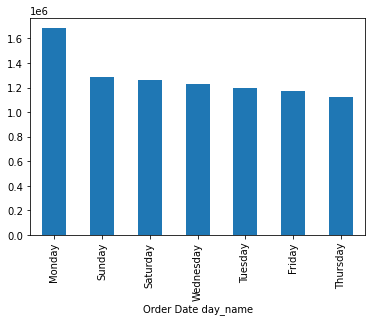

In [52]:
df.groupby('Order Date day_name')['Sales'].sum().sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='Order Date month'>

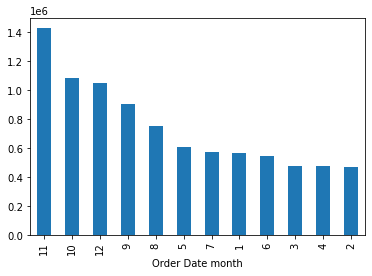

In [54]:
df.groupby('Order Date month')['Sales'].sum().sort_values(ascending=False).plot(kind='bar')

We can deduce that there is some info that can be found from the day name and month features and these features can be useful predicting sales for future also

<AxesSubplot:xlabel='Days to Ship'>

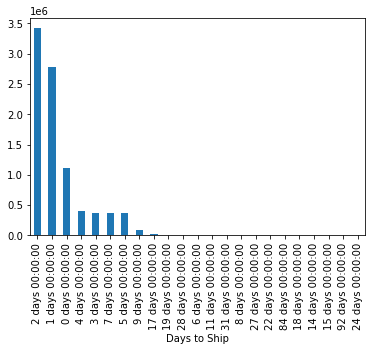

In [58]:
df.groupby('Days to Ship')['Sales'].sum().sort_values(ascending=False).plot(kind='bar')

### Target guided Ordinal encoding

In [59]:
df=pd.read_csv('../Day5-Feature_Scaling, Handling Missing Features/house-price-pred.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [60]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [61]:
df['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [63]:
df['FireplaceQu'].fillna(value='Missing',inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Missing,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [68]:
df['FireplaceQu']=df['FireplaceQu'].astype(str).str[0]
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,M,Attchd,208500
1,Gd,T,Attchd,181500
2,Gd,T,Attchd,223500
3,TA,G,Detchd,140000
4,Gd,T,Attchd,250000


In [73]:
df.groupby(['FireplaceQu'])['SalePrice'].mean().sort_values(ascending=False)

FireplaceQu
E    337712.500000
G    226351.415789
T    205723.488818
F    167298.484848
M    141331.482609
P    129764.150000
Name: SalePrice, dtype: float64

In [76]:
dict1=dict(df.groupby(['FireplaceQu'])['SalePrice'].mean().sort_values())
dict1

{'P': 129764.15,
 'M': 141331.48260869566,
 'F': 167298.48484848486,
 'T': 205723.48881789137,
 'G': 226351.41578947369,
 'E': 337712.5}

In [78]:
dict2={k:i for i,k in enumerate(dict1,0)}
dict2

{'P': 0, 'M': 1, 'F': 2, 'T': 3, 'G': 4, 'E': 5}

In [80]:
df['FireplaceQu']=df['FireplaceQu'].map(dict2)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,1,Attchd,208500
1,Gd,3,Attchd,181500
2,Gd,3,Attchd,223500
3,TA,4,Detchd,140000
4,Gd,3,Attchd,250000


### Target guided Mean encoding

In [81]:
df=pd.read_csv('../Day5-Feature_Scaling, Handling Missing Features/house-price-pred.csv',usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [82]:
df['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', nan, 'Basment', '2Types'],
      dtype=object)

In [83]:
df['GarageType'].fillna(value='Missing',inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [85]:
df.groupby('GarageType')['SalePrice'].mean().sort_values()

GarageType
Missing    103317.283951
CarPort    109962.111111
Detchd     134091.162791
2Types     151283.333333
Basment    160570.684211
Attchd     202892.656322
BuiltIn    254751.738636
Name: SalePrice, dtype: float64

In [86]:
df['GarageType_target_mean']=df['GarageType'].map(dict(df.groupby('GarageType')['SalePrice'].mean().sort_values()))
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,GarageType_target_mean
0,Gd,NaN,Attchd,208500,202892.656322
1,Gd,TA,Attchd,181500,202892.656322
2,Gd,TA,Attchd,223500,202892.656322
3,TA,Gd,Detchd,140000,134091.162791
4,Gd,TA,Attchd,250000,202892.656322


### Probability ratio encoding

In [87]:
df=pd.read_csv('titanic.csv',usecols=['Cabin','Survived'])
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [88]:
df['Cabin'].fillna(value='Missing',inplace=True)
df.head()

,Survived,Cabin
0,0,Missing
1,1,C85
2,1,Missing
3,1,C123
4,0,Missing


In [89]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [90]:
df['Cabin']=df['Cabin'].astype(str).str[0]
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


In [91]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [95]:
prob_df=df.groupby('Cabin')['Survived'].mean().sort_values()
prob_df=pd.DataFrame(prob_df)
prob_df

,Survived
Cabin,
T,0.000000
M,0.299854
A,0.466667
G,0.500000
C,0.593220
F,0.615385
B,0.744681
E,0.750000
D,0.757576


In [96]:
prob_df['Died']=1-prob_df['Survived']
prob_df

,Survived,Died
Cabin,,
T,0.000000,1.000000
M,0.299854,0.700146
A,0.466667,0.533333
G,0.500000,0.500000
C,0.593220,0.406780
F,0.615385,0.384615
B,0.744681,0.255319
E,0.750000,0.250000
D,0.757576,0.242424


In [97]:
prob_df['prob_ratio']=prob_df['Survived']/prob_df['Died']
prob_df

,Survived,Died,prob_ratio
Cabin,,,
T,0.000000,1.000000,0.000000
M,0.299854,0.700146,0.428274
A,0.466667,0.533333,0.875000
G,0.500000,0.500000,1.000000
C,0.593220,0.406780,1.458333
F,0.615385,0.384615,1.600000
B,0.744681,0.255319,2.916667
E,0.750000,0.250000,3.000000
D,0.757576,0.242424,3.125000


In [98]:
dict1=prob_df['prob_ratio'].to_dict()
dict1

{'T': 0.0,
 'M': 0.42827442827442824,
 'A': 0.875,
 'G': 1.0,
 'C': 1.4583333333333333,
 'F': 1.6000000000000003,
 'B': 2.916666666666666,
 'E': 3.0,
 'D': 3.125}

In [99]:
df['Cabin']=df['Cabin'].map(dict1)
df.head()

,Survived,Cabin
0,0,0.428274
1,1,1.458333
2,1,0.428274
3,1,1.458333
4,0,0.428274
